In [1]:
from data_reader import DataReader
from data_manipulator import *
import pandas as pd
import numpy as np
import seaborn as sns
datareader = DataReader()
df = datareader.get_all_data()
df

,RIS PROCEDURE CODE,RIS PROCEDURE DESCRIPTION,PACS SITE PROCEDURE CODE,PACS PROCEDURE DESCRIPTION,PACS STUDY DESCRIPTION,PACS BODY PART,PACS MODALITY,DEFAULT LOCALIZATION FOR FEM,ON WG IDENTIFIER,src_file
0,202036,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
1,202054,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
2,202061,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
3,202099,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
4,202030,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
5,202037,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
6,202021,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
7,202023,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
8,202024,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv
9,202025,NaN,NaN,NaN,NaN,NaN,XA,0,100001,input_data/Mount Sinai - MSH-ALL-CM.csv


In [2]:
#This code would take a few days to run, and due to time constraints, I can't run it (Don't have access to GPU anymore).
# I don't have all the output anymore, but I can print out the most notable performers
if False:
    # Load all models
    from Models.logistic_regression import MultiClassLogisticRegression
    from Models.naive_bayes import NaiveBayes
    from Models.naive_bayes import MultinomialNaiveBayes
    from Models.random_forest import RandomForest
    from Models.svm import SVM
    from Models.neural_net import MultiClassNNScratch
    
    # split the data into train/validate/test
    train_x_raw, train_y_raw, val_x_raw, val_y_raw, test_x_raw, test_y_raw = get_train_validate_test_split(df)

    # define all the tokenizer functions as a list of lambdas
    tokenizers = [('repeats, shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=True, remove_empty=True, remove_num=True))),
                 ('repeats, shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=True, remove_empty=True, remove_num=False))),
                 ('repeats, no shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=False, remove_empty=True, remove_num=True))),
                 ('repeats, no shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=True, remove_short=False, remove_empty=True, remove_num=False))),
                 ('no repeats, shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=True, remove_empty=True,remove_num=True))),
                 ('no repeats, shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=True, remove_empty=True,remove_num=False))),
                 ('no repeats, no shorts, nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=False, remove_empty=True, remove_num=True))),
                 ('no repeats, no shorts, no nums',(lambda x, y: tokenize(x, y, remove_repeats=False, remove_short=False, remove_empty=True, remove_num=False)))]
    # define all the embeddings as a list of lambdas
    embeddings = [('doc2vec_1024',(lambda x,y,model: tokens_to_doc2vec(x, y, model=model, vector_size=1024))),
                  ('doc2vec_4196', (lambda x, y, model: tokens_to_doc2vec(x, y, model=model, vector_size=4196))),
                  ('doc2vec_8192',(lambda x,y,model: tokens_to_doc2vec(x, y, model=model, vector_size=16384))),
                  ('bagofwords',(lambda x,y, feature_names: tokens_to_bagofwords(x, y, vectorizer_class=CountVectorizer, feature_names=feature_names))),
                  ('tfidf',(lambda x, y, feature_names: tokens_to_bagofwords(x, y, vectorizer_class=TfidfVectorizer, feature_names=feature_names)))]
    # Load all the models into a list. All models are children of a self-defined model class
    # Thus, they can be train/tested in the same way
    models = [('logistic_regression', MultiClassLogisticRegression), ('naive_bayes', NaiveBayes), ('multinomial_naive_bayes', MultinomialNaiveBayes), ('random_forest', RandomForest), ('svm', SVM), ('nn', MultiClassNNScratch)]

    # iterate over tokenizers
    for tokenizer_name, tokenizer in tokenizers:
        # Tokenize all data
        train_x, train_y = tokenizer(train_x_raw, train_y_raw)
        val_x, val_y = tokenizer(val_x_raw, val_y_raw)
        test_x, test_y = tokenizer(test_x_raw, test_y_raw)
        # iterate over embeddings
        for embedding_name, embedding in embeddings:
            # embedd all tekenized data
            emb_train_x, emb_train_y, pass_on = embedding(train_x, train_y, None)
            emb_val_x, emb_val_y, _ = embedding(val_x, val_y, pass_on)
            emb_test_x, emb_test_y, _ = embedding(test_x, test_y, pass_on)
            # iterate over all models
            for model_name, the_model in models:
                # train and test model with transformed data.
                # output score
                if model_name == 'nn':
                    print('training: ' + tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    model = the_model(train_x.shape, np.array(data_reader.get_region_labels()['Code']), epochs=100,
                                                    batch_size=256)
                    model.set_train_data(train_x, train_y)
                    model.train(val_x, val_y)
                    print(tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    evaluate_model_nn(model, test_x, test_y, plot_roc=False)
                else:
                    print('training: ' + tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    model = the_model()
                    model.train(train_x, train_y)
                    print(tokenizer_name + ' ' + embedding_name + ' ' + model_name)
                    evaluate_model(model, test_x, test_y, plot_roc=False)
else:
    print('repeats, shorts, nums with doc2vec_8192 on Neural net: 42%')
    print('repeats, shorts, nums with doc2vec_8192 on Logistic Regression: 9.1%')
    print('repeats, shorts, nums with doc2vec_8192 on Random Forest: 9.4%')
    print('repeats, shorts, nums with doc2vec_8192 on Naive Bayes: 18%')
    print('')
    print('repeats, shorts, nums with bagofwords on Neural net: 90.7%')
    print('repeats, shorts, nums with bagofwords on Logistic Regression: 79.8%')
    print('repeats, shorts, nums with bagofwords on Random Forest: 73.3%')
    print('repeats, shorts, nums with bagofwords on Naive Bayes: 73%')
    print('')
    print('repeats, shorts, nums with tfidf on Neural net: 88%')
    print('repeats, shorts, nums with tfidf on Logistic Regression: 72.4%')
    print('repeats, shorts, nums with tfidf on Random Forest: 79.1%')
    print('repeats, shorts, nums with tfidf on Naive Bayes: 78%')    

repeats, shorts, nums with doc2vec_8192 on Neural net: 42%
repeats, shorts, nums with doc2vec_8192 on Logistic Regression: 9.1%
repeats, shorts, nums with doc2vec_8192 on Random Forest: 9.4%
repeats, shorts, nums with doc2vec_8192 on Naive Bayes: 18%

repeats, shorts, nums with bagofwords on Neural net: 90.7%
repeats, shorts, nums with bagofwords on Logistic Regression: 79.8%
repeats, shorts, nums with bagofwords on Random Forest: 73.3%
repeats, shorts, nums with bagofwords on Naive Bayes: 73%

repeats, shorts, nums with tfidf on Neural net: 88%
repeats, shorts, nums with tfidf on Logistic Regression: 72.4%
repeats, shorts, nums with tfidf on Random Forest: 79.1%
repeats, shorts, nums with tfidf on Naive Bayes: 78%


In [3]:
#This would take too long to run (Don't have access to GPU anymore), but I can print out the results I got from it.
if False:
    from gensim.models import word2vec
    from gensim.models.keyedvectors import KeyedVectors
    # load pubmed word2vec model
    model = KeyedVectors.load_word2vec_format('wikipedia-pubmed-and-PMC-w2v.bin', binary=True)

    #split data into train/validate/test splits and tokenize it
    train_x_raw, train_y_raw, val_x_raw, val_y_raw, test_x_raw, test_y_raw = get_train_validate_test_split(df)
    tokens_x, train_y_raw = tokenize(train_x_raw, train_y_raw, save_missing_feature_as_string=False, remove_empty=True)

    # iterate over data, and calcaulte word embedding for all tokenized words.
    # Take the average and use that as the representation for the document
    avg = []
    for item in tokens_y:
        words = []
        for word in item:
            if word in model.wv.vocab:
                vec = model.get_vector(word)
                words.append(vec)
        average = np.average(np.array(words),axis=0)
        if type(average) == np.float64:
            avg.append(np.zeros(200))
        else:
            avg.append(list(average))
    pub_med_y = np.array(avg)

    #Load all models and evaluation functions
    from Models.neural_net import MultiClassNNScratch
    from cached_models import _get_nn_model_bag_of_words_simple_scratch
    from supervised_methods import evaluate_model_nn
    from supervised_methods import evaluate_model

    # create and test neural net model
    nn_model =  _get_nn_model_bag_of_words_simple_scratch(pub_med_x, train_y_raw, pub_med_z, val_y_raw, dr.get_region_labels()['Code'], epochs=100, batch_size=256)
    evaluate_model_nn(nn_model, pub_med_y, test_y)
    # Accuracy was 83.9%

    # create and test logistic regression model
    from Models.logistic_regression import MultiClassLogisticRegression
    log_reg = MultiClassLogisticRegression()
    log_reg.train(pub_med_x, train_y)
    evaluate_model(log_reg, pub_med_y, test_y)
    # Accuracy was 61.4%

    # create and test random forest model
    from Models.random_forest import RandomForest
    rand_for = RandomForest()
    and_for.train(pub_med_x, train_y)
    evaluate_model(rand_for, pub_med_y, test_y)
    # Accuracy was 61.9%

    # create and test naive bayes model
    from Models.naive_bayes import NaiveBayes
    nb = NaiveBayes()
    nb.train(pub_med_x, train_y)
    evaluate_model(nb, pub_med_y, test_y)
    # Accuracy was 57.2%
else:
    print('Neural network + pubmed representation: 83.9%')
    print('Logistic Regression + pubmed representation: 61.4%')
    print('Random Forest + pubmed representation: 61.9%')
    print('Naive Bayes + pubmed representation: 57.2%')

Neural network + pubmed representation: 83.9%
Logistic Regression + pubmed representation: 61.4%
Random Forest + pubmed representation: 61.9%
Naive Bayes + pubmed representation: 57.2%


In [4]:
# This code also takes long to run (Don't have access to GPU anymore), but I can print out the results. 
if False: 
    # Split data into train/validate/test and run bag of words
    train_x_raw, train_y_raw, val_x_raw, val_y_raw, test_x_raw, test_y_raw = get_train_validate_test_split(df)
    train_x, train_y, val_x, val_y, test_x, test_y = bagofwords_no_empty_val(train_x_raw, train_y_raw,
                                                                                    val_x_raw, val_y_raw, test_x_raw,
                                                                                    test_y_raw)
    
    # train and get an autoencoder that reduces the dimensionality to 4096
    encoder, decoder = get_encoder(train_x, test_x, 4096)
    # Use the encoder to encode the trian/validate/test data
    encoded_train = encoder.predict(train_x)
    encoded_test = encoder.predict(test_x)
    encoded_val = encoder.predict(val_x)

    
    #Load all models and evaluation functions
    from Models.neural_net import MultiClassNNScratch
    from cached_models import _get_nn_model_bag_of_words_simple_scratch
    from supervised_methods import evaluate_model_nn
    from supervised_methods import evaluate_model

    # create and test neural net model
    nn_model =  _get_nn_model_bag_of_words_simple_scratch(encoded_train, train_y, encoded_val, val_y, dr.get_region_labels()['Code'], epochs=100, batch_size=256)
    evaluate_model_nn(nn_model, encoded_test, test_y)
    # Accuracy was 77.9%

    # create and test logistic regression model
    from Models.logistic_regression import MultiClassLogisticRegression
    log_reg = MultiClassLogisticRegression()
    log_reg.train(encoded_train, train_y)
    evaluate_model(log_reg, encoded_test, test_y)
    # Accuracy was 79.7%

    # create and test random forest model
    from Models.random_forest import RandomForest
    rand_for = RandomForest()
    and_for.train(encoded_train, train_y)
    evaluate_model(rand_for, encoded_test, test_y)
    # Accuracy was 69.1%

    # create and test naive bayes model
    from Models.naive_bayes import NaiveBayes
    nb = NaiveBayes()
    nb.train(encoded_train, train_y)
    evaluate_model(nb, encoded_test, test_y)
    # Accuracy was 60.5%
else:
    print('Neural network + autoencoder representation: 77.9%')
    print('Logistic Regression + autoencoder representation: 79.7%')
    print('Random Forest + autoencoder representation:67.1%')
    print('Naive Bayes + autoencoder representation: 60.5%')    

Neural network + autoencoder representation: 77.9%
Logistic Regression + autoencoder representation: 79.7%
Random Forest + autoencoder representation:67.1%
Naive Bayes + autoencoder representation: 60.5%


In [5]:
# The output of this code gets saved into a file, which is visualized in the next box.
if False:
    from random import shuffle

    #Get vocab of entire data_set
    all_tokens, _ = tokenize(df, df, save_missing_feature_as_string=False, remove_empty=True)
    _, _, vocab = tokens_to_bagofwords(all_tokens, all_tokens)

    #get list of all sites
    lst = []
    for i in df['src_file'].unique():
        lst.append(df[df['src_file'] == i])

    # Create model and save the empty model weights
    from Models.neural_net import MultiClassNNScratch
    model = MultiClassNNScratch((0, len(vocab)), np.array(data_reader.get_region_labels()['Code']), epochs=100,
                                    batch_size=256)
    model.model.save_weights('empty_model.h5')

    # Run the experiment 15 times
    for j in range(15):

        # Shuffle the list of sites
        shuffle(lst)

        # iterate through the list of sites, and store the output in a file
        i = 1
        file = open("output_dir/" + randomword(7) + '.txt', "w")
        while i < len(lst):
            # Reset the model to be empty
            model.model.load_weights('empty_model.h5')
            # Create train test split based on sites
            train_set = lst[:i]
            test_set = lst[i:]

            #split the test set into input and output, and tokenize and bag of words the input data
            test_x_raw, test_y_raw = get_x_y_split(pd.concat(test_set))
            test_tokens, test_y_raw = tokenize(test_x_raw, test_y_raw, save_missing_feature_as_string=False,
                                                   remove_empty=True)
            test_x, test_y, _ = tokens_to_bagofwords(test_tokens, test_y_raw, feature_names=vocab)

            # split the train set into train/validate and tokenize and bagofwords the input data
            item = pd.concat(train_set)
            train_x_raw, train_y_raw, val_x_raw, val_y_raw = get_train_test_split(item)
            train_tokens, train_y_raw = tokenize(train_x_raw, train_y_raw, save_missing_feature_as_string=False, remove_empty=True)
            train_x, train_y, _ = tokens_to_bagofwords(train_tokens, train_y_raw, feature_names=vocab)

            val_tokens, val_y_raw = tokenize(val_x_raw, val_y_raw, save_missing_feature_as_string=False, remove_empty=True)
            val_x, val_y, _ = tokens_to_bagofwords(val_tokens, val_y_raw, feature_names=vocab)

            # train the model
            model.set_train_data(train_x, train_y)
            model.train(val_x, val_y)

            #test the model and save the results.
            accuracy = evaluate_model_nn(model, test_x, test_y, plot_roc=False)
            file.write("%d, %d, %4.2f, %d"%(len(train_set), len(test_set), accuracy, len(item)))

            i+=1
        file.close()
        j+=1

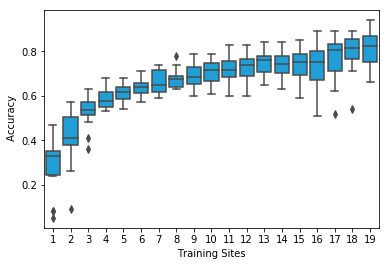

In [6]:
# The above process outputs several files, which I concatenate and print.
# It takes very long to calcualate, so I'll work with the already calculated numbers.
accuracy_per_site = pd.read_csv('intermediate_data/accuracy_per_site_individual.csv', sep=',', header=0)
sns.boxplot(x='Training Sites', y=' Accuracy', data=accuracy_per_site, color='#03A9F4').get_figure().savefig('accuracy_per_site_box') 

In [1]:
from data_reader import DataReader
from data_manipulator import *
import pandas as pd
import numpy as np
import seaborn as sns
from sys import exit
import doc2vec
import data_manipulator
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from run_autoencoder import get_encoder

datareader = DataReader()
df = datareader.get_all_data()
train_x, train_y, test_x, test_y = get_train_test_split(df)
tokens_train, train_y_raw = tokenize_columns(train_x, train_y, save_missing_feature_as_string=False, remove_repeats=True,
                remove_num=True)
tokens_test, test_y_raw = tokenize_columns(test_x, test_y, save_missing_feature_as_string=False, remove_repeats=True,
                remove_num=True)


#d2v
train_x, train_y, _ = tokens_to_doc2vec(tokens_train, train_y_raw)
x = train_x
y = train_y['ON WG IDENTIFIER'].values
print('doc2vec sil score: ' + str(silhouette_score(x, y)))

#bow
train_x, train_y, feature_names = tokens_to_bagofwords(tokens_train, train_y_raw)
x = train_x
y = train_y['ON WG IDENTIFIER'].values
print('bow sil score: ' + str(silhouette_score(x, y)))

#tfidf
corpus = list(map(' '.join, tokens_train[:]))
vectorizer = TfidfVectorizer()
mat = vectorizer.fit_transform(corpus)
print('tfidf score: ' + str(silhouette_score(mat, y)))

#pca
pca = PCA()
pca.fit(train_x.toarray())
var = np.cumsum(pca.explained_variance_ratio_)
n_comp = np.argmax(var > .9) + 1
pca = PCA(n_components=n_comp)
pca.fit(train_x.toarray())
train_x = pca.fit_transform(train_x.toarray())
print('pca score: ' + str(silhouette_score(train_x, y)))


Using TensorFlow backend.


doc2vec sil score: -0.25722834
bow sil score: -0.04758753312752765
tfidf score: -0.018019559041997903
pca score: -0.06758328806007351
